In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

In [10]:
os.chdir("/Users/sandeepsingh/Desktop")
df = pd.read_csv('technical_support_data-2.csv')

In [11]:
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [15]:
df.shape

(23, 8)

In [18]:
#We need ro group data based on simillar types using K means CLustering

In [19]:
#First we need to consider only numeric columns (ignore the problem type column here)
df1= df.iloc[:,1:]
df1.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,170,1.3,32,0.04,0.0,75,25
1,12,2.0,150,0.01,0.5,5,95
2,5,1.0,35,0.02,0.2,90,10
3,3,2.0,8,0.01,0.7,5,95
4,45,2.3,54,0.15,0.0,99,1


In [22]:
#next we need to sscale all columns (Remeber distance based algo, so scaling is a must)
df2= df1.apply(zscore)

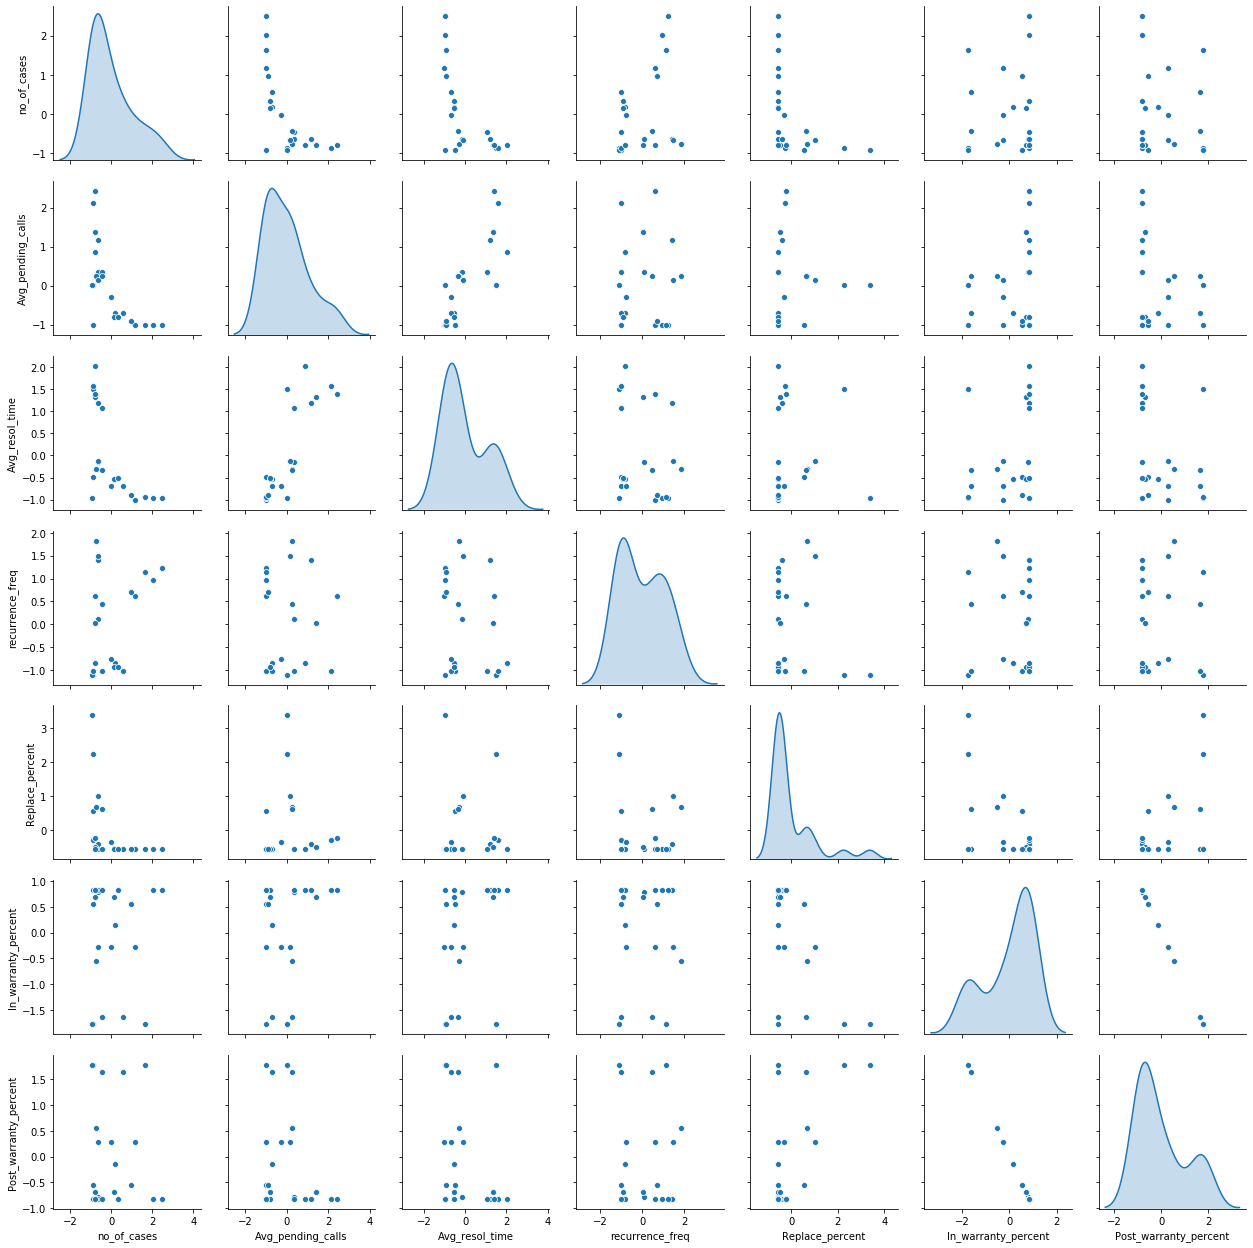

In [23]:
#next lets find the optimum no of cluster (just by visualisation)
sns.pairplot(df2,diag_kind = 'kde')

#Just by lokking at the data it looks like we can have 3-4 clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

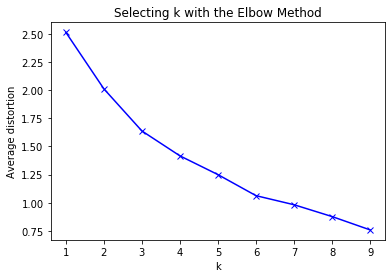

In [25]:
#Let's try to find the optimul number of clusters using ELBOW METHOD 

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df2)
    prediction=model.predict(df2)
    meanDistortions.append(sum(np.min(cdist(df2, model.cluster_centers_, 'euclidean'), axis=1)) / df2.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [28]:
#looks like we can have 3 or 5 clusters
#Trying with 3
final_model = KMeans(3)
final_model.fit(df2)
prediction = final_model.predict(df2)

#Appending the predictions (on both orogonal data as well as scaled data)
df['Group'] = prediction
df2['Group'] = prediction

df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,0
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,0
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,2


In [30]:
#Analysing the distribution of the scaled data for the groups formed
df_cluster = df2.groupby(['Group'])
df_cluster.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
Group,,,,,,,
0,-0.201991,-0.151228,-0.262973,0.240375,0.97053,-1.348020,1.348020
1,0.709754,-0.839940,-0.735168,-0.105763,-0.41174,0.427028,-0.427028
2,-0.710550,1.231151,1.208189,-0.104395,-0.44115,0.798984,-0.798984


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc178e40450>,
      dtype=object)

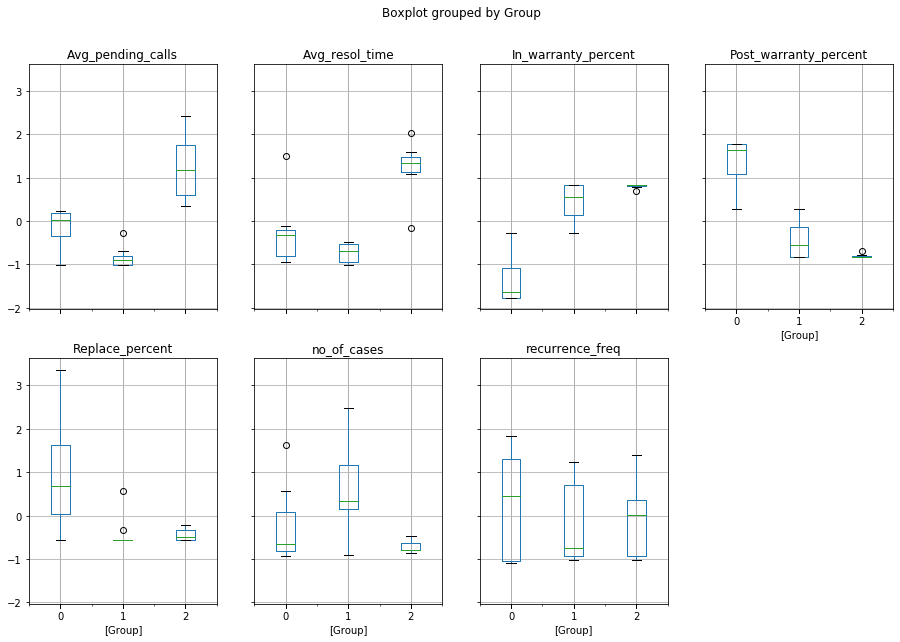

In [34]:
#Visualising the data of the groups formed
df2.boxplot(by='Group',layout=(2,4),figsize=(15,10))

In [35]:
#Trying with 5
final_model = KMeans(5)
final_model.fit(df2)
prediction = final_model.predict(df2)

#Appending the predictions (on both orogonal data as well as scaled data)
df['Group'] = prediction
df2['Group'] = prediction

df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,4
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,4
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,2


In [36]:
df_cluster = df2.groupby(['Group'])
df_cluster.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
Group,,,,,,,
0,-0.053943,-0.722017,-0.555718,-0.894903,-0.291961,0.384444,-0.384444
1,0.073950,-0.222577,-0.479306,0.777232,0.235815,-1.175947,1.175947
2,-0.710550,1.231151,1.208189,-0.104395,-0.441150,0.798984,-0.798984
3,1.664375,-0.987344,-0.959481,0.880663,-0.561463,0.480258,-0.480258
4,-0.891842,0.027143,0.277859,-1.101765,2.807317,-1.778204,1.778204


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc19ba86cd0>,
      dtype=object)

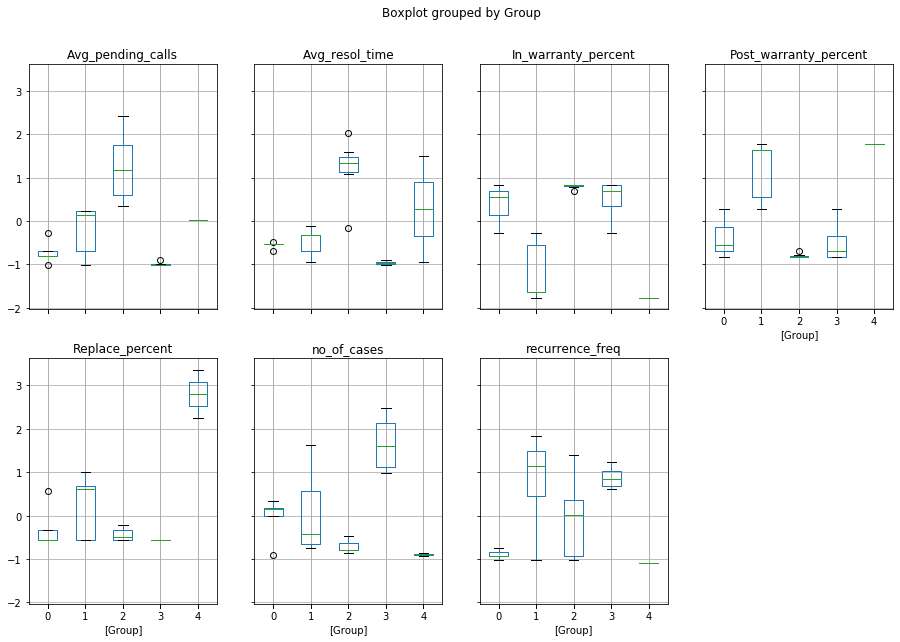

In [37]:
df2.boxplot(by='Group',layout=(2,4),figsize=(15,10))